In [37]:
import quandl
import yfinance as yf
import requests
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [59]:
# Read in Treasury yields from US Department of Treasury website (updated daily)
yield_data = pd.read_csv('https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/all/all?type=daily_treasury_yield_curve&field_tdr_date_value=all&page&_format=csv')
yield_data['Date'] = pd.to_datetime(yield_data["Date"])
yield_data = yield_data.set_index('Date')
yield_data.head()

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2022-05-06,0.48,0.72,0.85,1.41,2.08,2.72,2.94,3.06,3.13,3.12,3.43,3.23
2022-05-05,0.49,0.71,0.85,1.37,2.08,2.71,2.91,3.01,3.07,3.05,3.35,3.15
2022-05-04,0.49,0.74,0.89,1.44,2.07,2.66,2.85,2.93,2.97,2.93,3.21,3.01
2022-05-03,0.48,0.77,0.91,1.45,2.16,2.78,2.95,3.01,3.03,2.97,3.21,3.03
2022-05-02,0.41,0.71,0.90,1.49,2.10,2.73,2.93,3.01,3.04,2.99,3.26,3.07


In [58]:
#Select yields to analyze
yield_curve = yield_data[['3 Mo','10 Yr','20 Yr']]
yield_curve.head()

,3 Mo,10 Yr,20 Yr
Date,,,
2022-05-06,0.85,3.12,3.43
2022-05-05,0.85,3.05,3.35
2022-05-04,0.89,2.93,3.21
2022-05-03,0.91,2.97,3.21
2022-05-02,0.90,2.99,3.26


In [61]:
# Set yield frequency as monthly
yield_curve = yield_curve.asfreq(freq='M').ffill()
yield_curve = yield_curve.loc['1990':]
yield_curve.tail()

,3 Mo,10 Yr,20 Yr
Date,,,
2021-12-31,0.06,1.52,1.94
2022-01-31,0.22,1.79,2.17
2022-02-28,0.35,1.83,2.25
2022-03-31,0.52,2.32,2.59
2022-04-30,0.52,2.32,2.59


<AxesSubplot:title={'center':'US Treasury Yield'}, xlabel='Date', ylabel='%'>

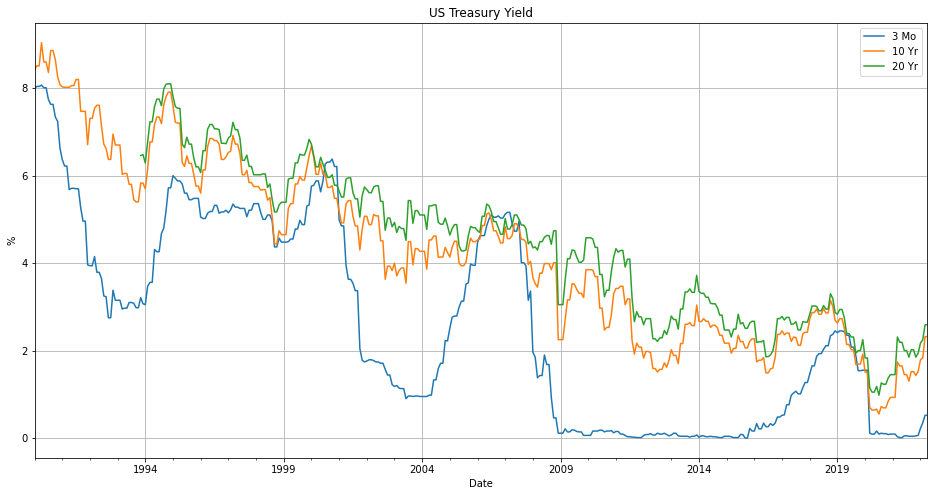

In [62]:
#Plot US Tresury yield curves
yield_curve.plot(figsize = (16,8), title = 'US Treasury Yield', ylabel = '%', grid=True)

In [64]:
#Create the difference between the long and short yield curve; You may select different long term yields (10YR, 20YR etc.)
long_short_diff = yield_curve['10 Yr'] - yield_curve['3 Mo']
long_short_diff.tail()

Date
2021-12-31    1.46
2022-01-31    1.57
2022-02-28    1.48
2022-03-31    1.80
2022-04-30    1.80
Freq: M, dtype: float64

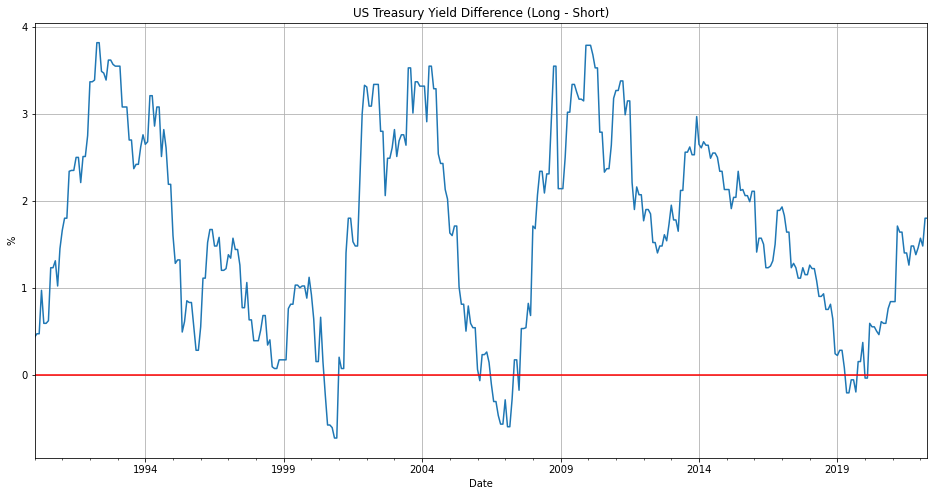

In [65]:
#Plot the difference between the long and short yield curve to identify inverted curve (y value below 0)
long_short_plot = long_short_diff.plot(figsize = (16,8), title = 'US Treasury Yield Difference (Long - Short)', ylabel = '%', grid=True)
plt.axhline(0, c='r')

In [78]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "1990-01-01" 
end= "2022-05-05"

sp_history = yf.download(ticker, start=start, end=end, progress=False)

In [79]:
# Set frequency to Monthly; Forward fill missing values
sp_history = sp_history['Adj Close'].asfreq(freq='M').ffill()
sp_history.tail()

Date
2021-12-31    4766.180176
2022-01-31    4515.549805
2022-02-28    4373.939941
2022-03-31    4530.410156
2022-04-30    4530.410156
Freq: M, Name: Adj Close, dtype: float64

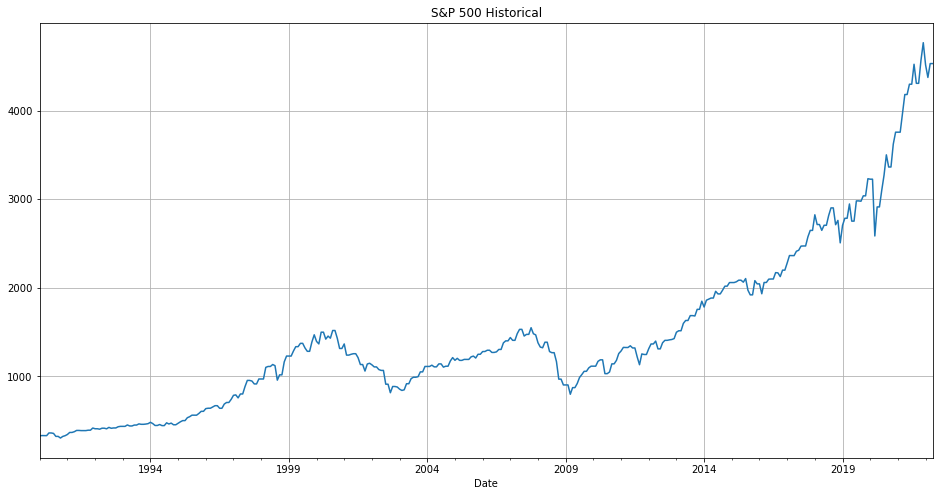

In [80]:
#Plot S&P Index historical data
sp_plot = sp_history.plot(figsize=(16,8), title='S&P 500 Historical', grid=True)

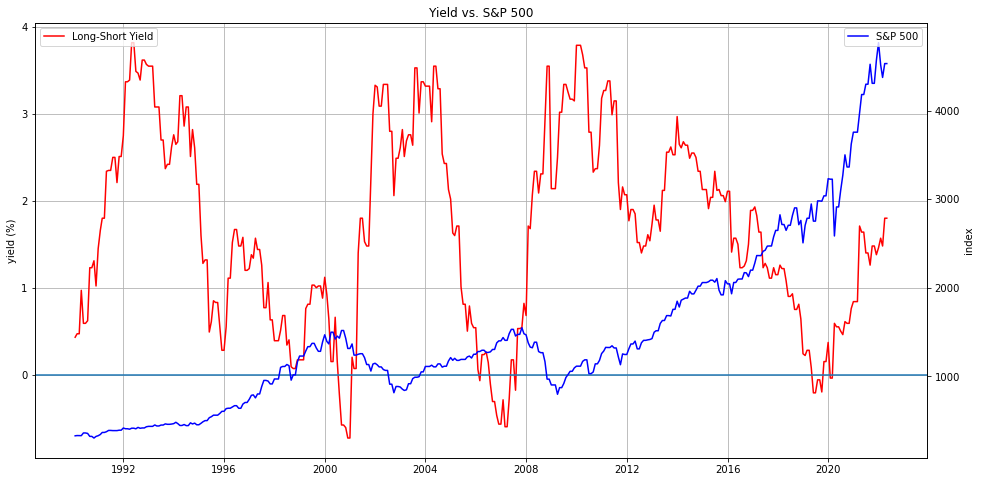

In [81]:
# Long-Short Yield Curve below 0 shows inverted curve.
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(long_short_diff, label ='Long-Short Yield', color='r')
ax.set_ylabel('yield (%)')
plt.grid()
ax.axhline(y=0)
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_history, label='S&P 500', color='b')
ax.set_title('Yield vs. S&P 500')
ax2.set_ylabel('index')
ax2.legend(loc='upper right')